In [16]:
import pandas as pd

### Load the dataset 

In [17]:
df = pd.read_csv('./dataset/CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Featured Engineering

In [18]:
df["company"] = df['name'].str.split(" ").str[0]
df.drop(df[df['km_driven'] > 350000].index, inplace=True)
df.drop(df[df['km_driven'] < 1000].index, inplace=True)
df = df.drop(['name', 'transmission', 'seller_type', 'owner'], axis=1)
df.drop(df[df['fuel'] == 'Electric'].index, inplace=True)
df.drop(df[df['year'] <= 1997].index, inplace=True)

### Train test split

In [19]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['selling_price'])
y = df['selling_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Load the pre-trained model

In [20]:
import pickle

model = pickle.load(open("pkl/car_price_model_final.pkl", "rb"))

c:\Users\Yadnesh\OneDrive\Desktop\codes\python_notes\XAI\.venv\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Yadnesh\OneDrive\Desktop\codes\python_notes\XAI\.venv\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator FunctionTransformer from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Yadnesh\OneDrive\Desktop\codes\python_notes\XAI\.venv\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning

### Test the loaded model

In [21]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
r2_score(y_test, y_pred)

0.9269948869211802

In [7]:
x.head()

,year,km_driven,fuel,company
0,2007,70000,Petrol,Maruti
1,2007,50000,Petrol,Maruti
2,2012,100000,Diesel,Hyundai
3,2017,46000,Petrol,Datsun
4,2014,141000,Diesel,Honda


### Separate out the column transformer

In [22]:
col_tar = model.named_steps["columntransformer"]
col_tar.get_feature_names_out().tolist()


['onehotencoder__fuel_CNG',
 'onehotencoder__fuel_Diesel',
 'onehotencoder__fuel_LPG',
 'onehotencoder__fuel_Petrol',
 'onehotencoder__company_Ambassador',
 'onehotencoder__company_Audi',
 'onehotencoder__company_BMW',
 'onehotencoder__company_Chevrolet',
 'onehotencoder__company_Daewoo',
 'onehotencoder__company_Datsun',
 'onehotencoder__company_Fiat',
 'onehotencoder__company_Force',
 'onehotencoder__company_Ford',
 'onehotencoder__company_Honda',
 'onehotencoder__company_Hyundai',
 'onehotencoder__company_Isuzu',
 'onehotencoder__company_Jaguar',
 'onehotencoder__company_Jeep',
 'onehotencoder__company_Kia',
 'onehotencoder__company_Land',
 'onehotencoder__company_MG',
 'onehotencoder__company_Mahindra',
 'onehotencoder__company_Maruti',
 'onehotencoder__company_Mercedes-Benz',
 'onehotencoder__company_Mitsubishi',
 'onehotencoder__company_Nissan',
 'onehotencoder__company_OpelCorsa',
 'onehotencoder__company_Renault',
 'onehotencoder__company_Skoda',
 'onehotencoder__company_Tata',

### Transform the test dataset

In [23]:
x_transformed = col_tar.transform(x_test)
x_transformed.toarray()

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 2.0170e+03,
        3.4000e+04],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 2.0140e+03,
        1.4100e+05],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 2.0140e+03,
        9.0000e+04],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 2.0150e+03,
        6.8000e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 2.0140e+03,
        2.0000e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 2.0160e+03,
        6.8523e+04]], shape=(865, 35))

### Separate out the random forest model

In [24]:
random_forest = model.named_steps["gridsearchcv"].estimator
random_forest.predict(x_transformed[0].reshape(1, -1))

array([228551.66666667])

### LIME

In [ ]:
from lime.lime_tabular import LimeTabularExplainer


explainer = LimeTabularExplainer(
    training_data=x_transformed.toarray(),
    feature_names=col_tar.get_feature_names_out().tolist(),
    mode="regression",
    discretize_continuous=True
)


### Explain local instance

In [26]:
userData = {
    'year': 2015,
    'km_driven': 50000,
    'fuel': 'LPG',
    'company': 'Audi'
}

# input = x_transformed.toarray()[0].reshape(1, -1)
input = col_tar.transform(pd.DataFrame([userData])).toarray()
exp = explainer.explain_instance(input[0], random_forest.predict, num_features=35)
exp.as_list()

[('onehotencoder__company_Mercedes-Benz <= 0.00', -1986795.7995367264),
 ('onehotencoder__company_BMW <= 0.00', -1868780.8177654764),
 ('onehotencoder__company_Audi > 0.00', 1726753.599728686),
 ('onehotencoder__company_Jaguar <= 0.00', -554681.6826464898),
 ('onehotencoder__company_Toyota <= 0.00', -446052.29090309946),
 ('onehotencoder__fuel_Diesel <= 0.00', -153607.56865935127),
 ('2014.00 < remainder__year <= 2016.00', 131036.38849968885),
 ('onehotencoder__company_Honda <= 0.00', -73204.60651895925),
 ('onehotencoder__company_Tata <= 0.00', 68481.12541562394),
 ('onehotencoder__company_Mahindra <= 0.00', -66144.97876924624),
 ('onehotencoder__company_Skoda <= 0.00', -61356.31572464906),
 ('onehotencoder__company_Ford <= 0.00', -54182.619006744615),
 ('onehotencoder__company_Volkswagen <= 0.00', -43873.56873738638),
 ('onehotencoder__company_Renault <= 0.00', 39176.53687324267),
 ('onehotencoder__company_Chevrolet <= 0.00', 38564.026918885786),
 ('onehotencoder__company_Nissan <= 0

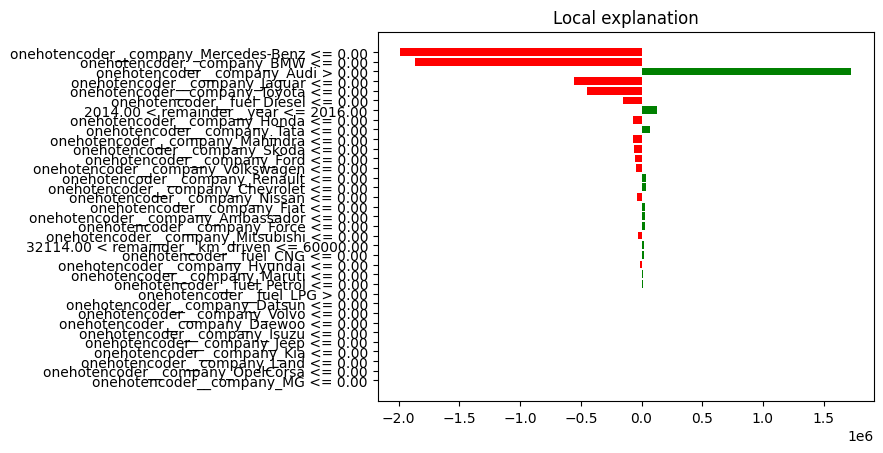

In [27]:
import matplotlib.pyplot as plt

fig = exp.as_pyplot_figure()
plt.show()